# **Assignment 2 Part 2**

### Assignment Instructions

* **How to install 'otter'**: Run `pip install otter-grader` in your Anaconda Command Prompt
* **Otter**: It is an autograder that we will be using for grading your notebooks.
* **grader.check('qn')**: This command runs test cases for nth question `qn` provided to you and displays the result. But these are not the only test cases, these are provided just for your basic testing. There will be some *hidden test cases* on which your answers will be tested as well.
* You are **not** allowed to edit any pre-defined variables and as per the instructions for every question you have to assign your answers to these variables.
* Write your answers in place of `...` and `pass`
* Hardcoded answers will get `zero` marks

### Submission Instructions

* There are two parts of this assignment. You should name both notebooks as **YourRollNumber_PartNumber.ipynb**. (e.g. this part should be named as *`2XXXXXXX_2.ipynb`*)
* You must submit a zip file containg just two notebooks and it must not has any folder or any other file. 
* The name of the zip file must be your `Roll Number`

In [756]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

In [757]:
import otter
grader = otter.Notebook()

In [758]:
# Do not change this cell

df_2019 = pd.read_csv('2019.csv', encoding='latin-1')
df_2020 = pd.read_csv('2020.csv', encoding='latin-1')
df_2021 = pd.read_csv('2021.csv', encoding='latin-1')

In [759]:
# Standardizing the column names
df_2019.columns = df_2019.columns.str.lower()
df_2020.columns = df_2019.columns.str.lower()
df_2021.columns = df_2019.columns.str.lower()

# Restructuring the column indexes
df_2019 = df_2019[['rank', 'university', 'region', 'academic reputation', 'employer reputation', 'faculty student', 'international faculty','international students', 'citations per faculty', 'overall score'] ]
df_2020 = df_2020[['rank', 'university', 'region', 'academic reputation', 'employer reputation', 'faculty student', 'international faculty','international students', 'citations per faculty', 'overall score'] ]
df_2021 = df_2021[['rank', 'university', 'region', 'academic reputation', 'employer reputation', 'faculty student', 'international faculty','international students', 'citations per faculty', 'overall score'] ]


Let's check a few rows from each dataframe

In [760]:
df_2019.sample(5)

,rank,university,region,academic reputation,employer reputation,faculty student,international faculty,international students,citations per faculty,overall score
62,63,University of Texas at Austin,USA,93.8,78.1,14.7,7.3,20.4,94.1,68.7
6,7,ETH Zurich - Swiss Federal Institute of Techno...,Switzerand,98.2,96.2,82.4,100.0,98.6,98.7,95.3
42,43,New York University (NYU),USA,95.6,91.3,97.3,28.4,90.9,23.7,77.7
14,15,Yale University,USA,99.9,99.7,100.0,86.3,61.2,60.2,89.6
57,58,Tokyo Institute of Technology (Tokyo Tech),Japan,74.6,80.0,90.4,31.0,27.1,59.8,71.0


In [761]:
df_2020.sample(5)

,rank,university,region,academic reputation,employer reputation,faculty student,international faculty,international students,citations per faculty,overall score
59,60,Ecole Polytechnique,Switzerland,66.3,97.9,95.2,99.6,99.3,43.8,70.5
88,89,University of Science and Technology of China,China,98.5,5.7,16.9,81.1,26.1,56.2,62.3
31,32,The Hong Kong University of Science and Techno...,China,89.5,87.5,100.0,59.5,71.3,85.0,80.6
58,58,Tokyo Institute of Technology (Tokyo Tech),Japan,61.3,31.3,30.7,86.2,82.7,74.5,70.9
97,98,Boston University,USA,62.1,88.6,33.8,53.8,57.5,63.1,60.5


In [762]:
df_2021.sample(5)

,rank,university,region,academic reputation,employer reputation,faculty student,international faculty,international students,citations per faculty,overall score
91,92,Lund University,Sweden,51.9,70.1,89.3,50.1,54.3,69.6,61.8
21,22,Peking University,China,73.0,36.9,70.7,72.3,99.6,99.1,84.3
48,49,University of Bristol,UK,61.8,75.6,89.4,72.8,84.2,76.6,74.5
81,82,Tohoku University,Japan,43.1,17.6,12.7,98.2,59.1,69.5,63.7
60,60,Shanghai Jiao Tong University,China,65.5,20.1,84.1,53.7,93.6,79.6,70.5


Let's also see where we stand in terms of Null values and data types

In [763]:
df_2019.info()
df_2020.info()
df_2021.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rank                    100 non-null    int64  
 1   university              100 non-null    object 
 2   region                  100 non-null    object 
 3   academic reputation     100 non-null    float64
 4   employer reputation     100 non-null    float64
 5   faculty student         100 non-null    float64
 6   international faculty   100 non-null    float64
 7   international students  100 non-null    float64
 8   citations per faculty   100 non-null    float64
 9   overall score           100 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 7.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  ------------

So, all good!

Notice that there is no 'year' column in any of the dataframe. As your first task, append an appropriate 'year' column in each dataframe.

**Q1.** Add a column 'year' in each dataframe. It must correspond to the year for which the data is represented. (2)

In [764]:
#Add code here
df_2019['year'] = 2019
df_2020['year'] = 2020
df_2021['year'] = 2021

In [765]:
grader.check("q1")

q1 results: All test cases passed!

**Q2.** Next, find the count of universities in each region that made it to the Top 100 each year. Print all of them in the same cell. (2)
<br> You will have three aggregated objects. Name them a,b,c for data belonging to 2019,2020,2021 respectively.

In [766]:
# #Add code here
df2019 = df_2019.groupby(['region']).agg({'university':'unique'})['university']#series of universities with their regions and for each region we can find the number of universities
df2020 = df_2020.groupby(['region']).agg({'university':'unique'})['university']
df2021 = df_2021.groupby(['region']).agg({'university':'unique'})['university']
counts_a = []
counts_b = []
counts_c = []
rgn_a = []
rgn_b = []
rgn_c = []
for i in range(len(df2019)):# counts of universities and names are stored in separate lists
    rgn_a.append(df2019.index[i])
    counts_a.append(len(df2019[i]))
for i in range(len(df2020)):
    rgn_b.append(df2020.index[i])
    counts_b.append(len(df2020[i]))
for i in range(len(df2020)):
    rgn_c.append(df2020.index[i])
    counts_c.append(len(df2020[i]))    
# these lists are then used to form a series
a = pd.Series(counts_a, index = rgn_a)
b = pd.Series(counts_b, index = rgn_b)
c = pd.Series(counts_c, index = rgn_c)


In [767]:
grader.check("q2")

q2 results: All test cases passed!

**Q3.** Using your answer to the previous question, visualize the count of universities in each region that made it to the Top 100 (for the year 2021). Note: you have to use a suitable visualization. (3)

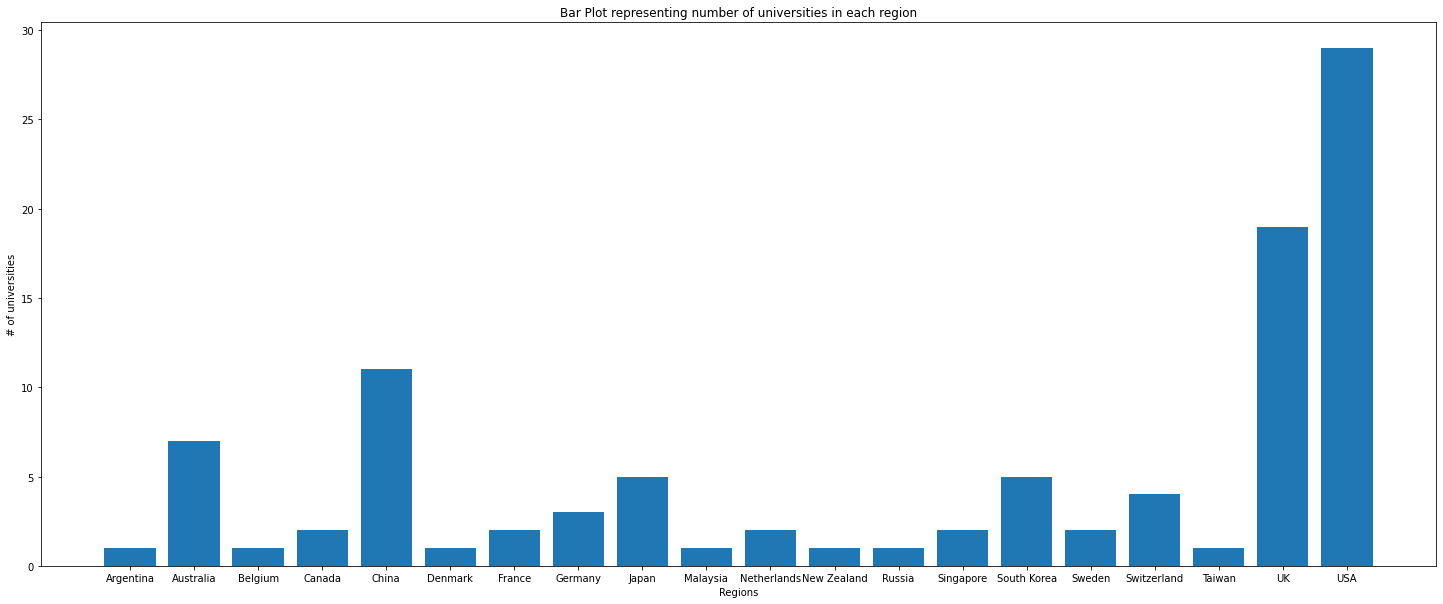

In [768]:
#Add code here

f, ax = plt.subplots(figsize=(25,10))
ax = plt.bar(rgn_c, counts_c)
plt.rcParams.update({'font.size': 10})
plt.title('Bar Plot representing number of universities in each region')
plt.xlabel('Regions')
plt.ylabel('# of universities')
plt.show()

**Q4.** Sort the 2020 dataframe based on overall score in an ascending order. (1)

In [769]:
#Add code here
df_2020 = df_2020.sort_values(by='overall score', ascending=True)
# df_2020

In [770]:
grader.check("q4")

q4 results: All test cases passed!

**Q5.** Drop the rank column from all dataframes (2019,2020,2021). (1)

In [771]:
#Add code here
df_2019.drop('rank', inplace=True, axis=1)
df_2020.drop('rank', inplace=True, axis=1)
df_2021.drop('rank', inplace=True, axis=1)

In [772]:
grader.check("q5")

q5 results: All test cases passed!

**Q6.** Create a new dataframe called "USA_2020", containing only universities which belong to the USA region from 2020 dataframe. Remove the 'year' and 'region' column from this dataframe. (2)

In [773]:
#Add code here
USA_2020 = df_2020.copy()# copy of 2020 dataframe
USA_2020 = USA_2020.query("region == 'USA'")# query to select all universities of US only
USA_2020.drop('year', inplace=True, axis=1)# drop the year column from new dataframe
USA_2020.drop('region', inplace=True, axis=1)# drop the region column from new dataframe
# USA_2020

In [774]:
grader.check("q6")

q6 results: All test cases passed!

**Q7.** In the 'USA_2020' dataframe, make the 'university' column the index of the dataframe. (2)

In [775]:
#Add code here
USA_2020.set_index('university', inplace=True)
# USA_2020

In [776]:
grader.check("q7")

q7 results: All test cases passed!

**Q8.** Using only the following attributes: 'academic reputation','employer reputation','faculty student','international faculty','international students','citations per faculty','overall score'. <br> Represent USA_2020 dataframe using a box and whisker plot. Do you observe any anomalies in any of them? (8)
<br>**Note:** They should be in the same cell, but not necessarily in the same figure.<br>

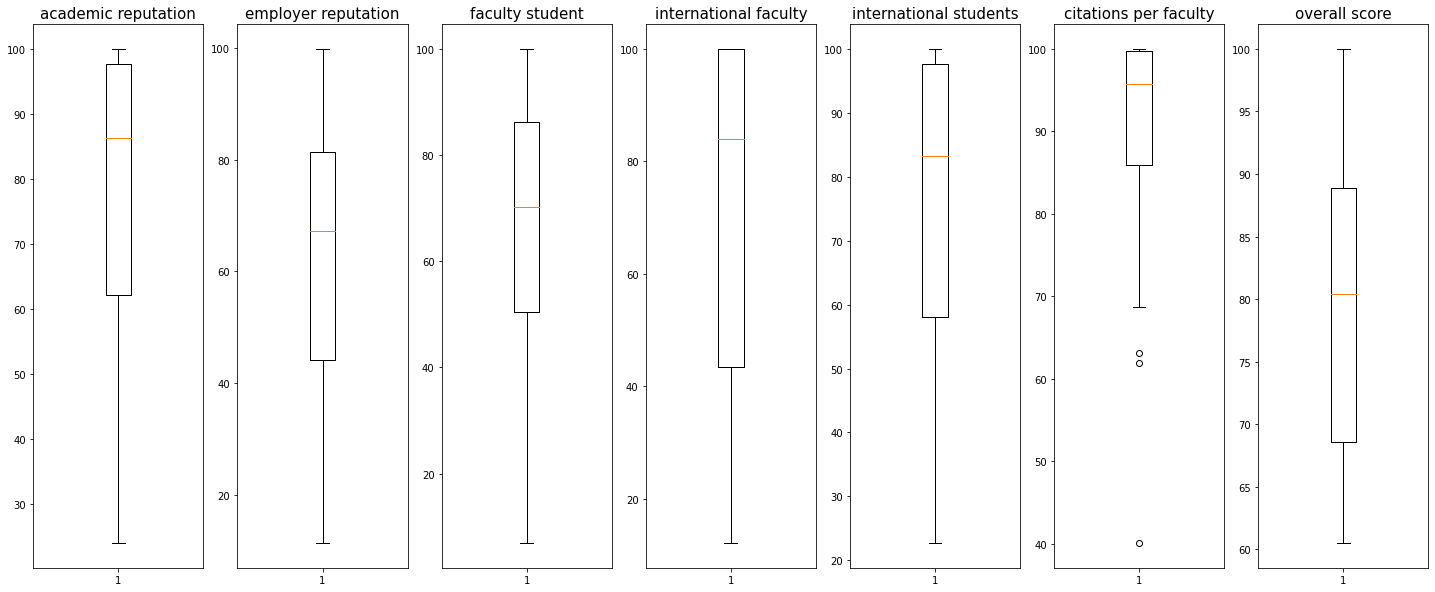

In [777]:
#Add code here

fig, axs = plt.subplots(1, len(USA_2020.columns), figsize = (25, 10))
for i in range(1, 8):
    plt.subplot(1, 7, i)
    plt.boxplot(USA_2020.iloc[:,i-1])
    plt.title(USA_2020.columns[i-1], fontsize = 15)
# there are anomalies in citations per faculty as we can see from the box and whisker plot that there are some points out of
# its lower point which are considered as outliers. Only citations per faculty has points that are far from its median.

**Q9.** Create a new dataframe called "USUK_2021". This dataframe will contain all universities in the "USA" and "UK" region. Once created, remove the 'year' and 'rank' column. Also, set the index of the "USUK_2021 to the "university" column. (3)<br>
**Note:** Very similar to Question 6 and the data to be used should belong to 2021 and not 2020.

In [778]:
#Add code here
USUK_2021 = df_2021.copy()# copy of 2021 dataframe
USUK_2021 = USUK_2021.query("region == 'USA' or region == 'UK'")# query to select all universities of US and UK only
USUK_2021.drop('year', inplace=True, axis=1)# drop the year column from new dataframe
USUK_2021.drop('region', inplace=True, axis=1)# drop the rank column from new dataframe
USUK_2021 = USUK_2021.set_index('university')
USUK_2021.head(1)

,academic reputation,employer reputation,faculty student,international faculty,international students,citations per faculty,overall score
university,,,,,,,
Massachusetts Institute of Technology (MIT),99.8,94.1,100.0,100.0,100.0,100.0,100.0


In [779]:
grader.check("q9")

q9 results: All test cases passed!

**Q10.** Represent all the attributes in the USUK_2021 dataframe using a scatter plot. Do you observe any general trend? (5+2) <br>
**Note:** They should be in the same cell, but not necessarily in the same figure.<br>

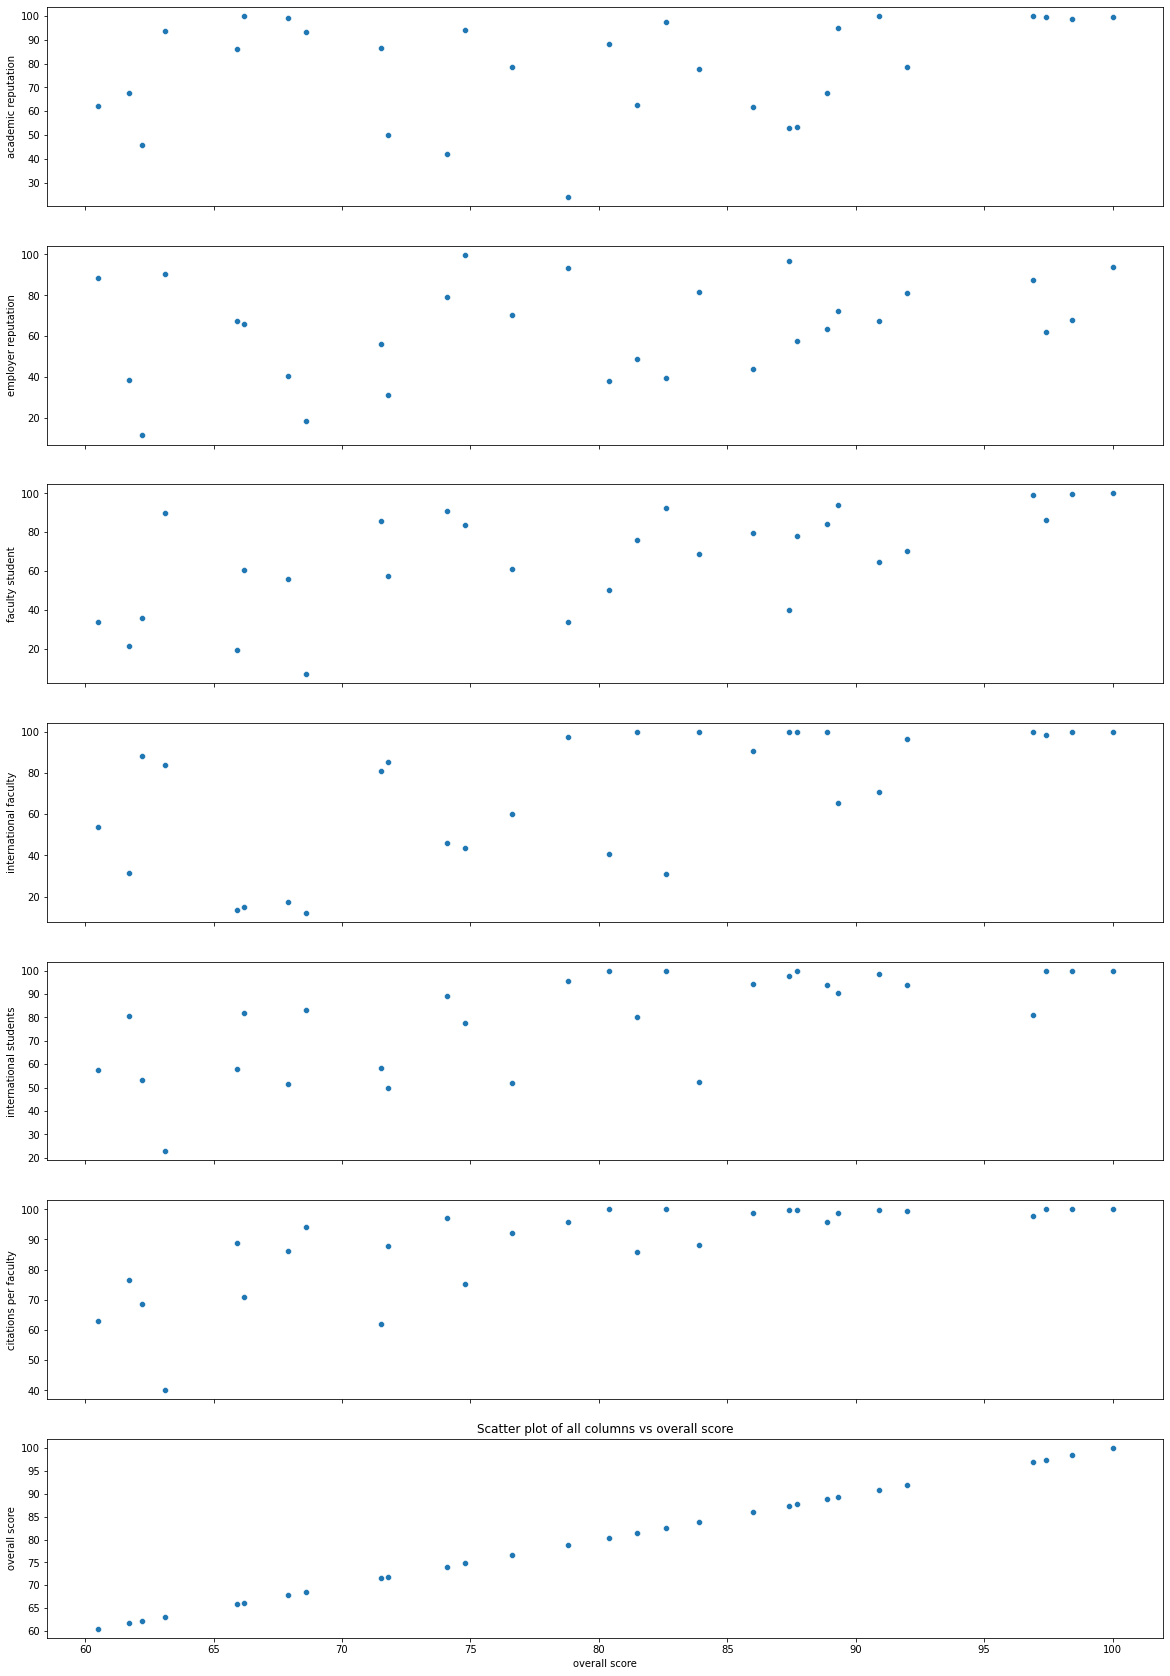

In [780]:
#Add code here

fig, axs = plt.subplots(7, sharex = True, figsize = (20, 30))
sns.scatterplot(ax = axs[0], data = USA_2020, x = 'overall score', y = USA_2020.iloc[:,0])
sns.scatterplot(ax = axs[1], data = USA_2020, x = 'overall score', y = USA_2020.iloc[:,1])
sns.scatterplot(ax = axs[2], data = USA_2020, x = 'overall score', y = USA_2020.iloc[:,2])
sns.scatterplot(ax = axs[3], data = USA_2020, x = 'overall score', y = USA_2020.iloc[:,3])
sns.scatterplot(ax = axs[4], data = USA_2020, x = 'overall score', y = USA_2020.iloc[:,4])
sns.scatterplot(ax = axs[5], data = USA_2020, x = 'overall score', y = USA_2020.iloc[:,5])
sns.scatterplot(ax = axs[6], data = USA_2020, x = 'overall score', y = USA_2020.iloc[:,6])
plt.title('Scatter plot of all columns vs overall score')
plt.show()

# As the overall score increases the value for the corresponding attribute also increases. data is not much skewed and
# forms almost a straight line

Let's finally look at an useful tool to get an idea about how different variables are corelated to each other. We call it a **correlation matrix** <br>
A correlation matrix provides a correlation coefficient (a number between -1 and 1) that tells how strongly two variables are correlated. Values closer to -1 mean strong negative correlation whereas values closer to 1 mean strong positve correlation. Values closer to 0 show variables having no or little correlation. <br>

**Q11.** Plot a correlation matrix to see how each variable is correlated to another. You can use the data from df_2019 . (3) <br> Provide a reasonable interpretation of the values obtained in the Correlation matrix. (1)

In [781]:
#Add code here

df_2019.corr()
# correlation coefficient = 1 for similar columns as they are completely correlated so the diagonal is 1
# we can ignore year column. among all citations per faculty has the least correlation with faculty student. overall score has
# fairly strong correlation with all other attributes. employer reputation has a strong relation with academic reputation as 
# it has a value above 0.6

,academic reputation,employer reputation,faculty student,international faculty,international students,citations per faculty,overall score,year
academic reputation,1.000000,0.638099,0.033301,-0.008442,0.114413,0.107028,0.785670,NaN
employer reputation,0.638099,1.000000,0.094293,0.178510,0.261781,-0.020299,0.651231,NaN
faculty student,0.033301,0.094293,1.000000,-0.071974,-0.063082,-0.261467,0.390808,NaN
international faculty,-0.008442,0.178510,-0.071974,1.000000,0.669626,0.177231,0.281803,NaN
international students,0.114413,0.261781,-0.063082,0.669626,1.000000,0.009999,0.304559,NaN
citations per faculty,0.107028,-0.020299,-0.261467,0.177231,0.009999,1.000000,0.369151,NaN
overall score,0.785670,0.651231,0.390808,0.281803,0.304559,0.369151,1.000000,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**How employable are you if you attend one of the top ten universities in the world? Let's find out.** <br><br>
**Q12.** Create a smaller dataframe which has the top ten universities from each year (based on overall score). Remove all columns except the 'employer reputation' column. We will be evaluating the top ten universities based on their employer reputation scores. Name the resultant dataframe, "resultant_df". (3) <br>
Hint: 

*   There will be four columns in the dataframe you make. One for the university name and the other three for their employer reputation scores across three years' data.
*   The top ten universities are same across the three years (by overall scores). Only their rankings differ.
*   Use the merge function. You can read more about how to use it in the documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
*   Shape of the resultant dataframe should be (10, 4)






In [782]:
# #Add code here
df_2019 = df_2019.sort_values(by=['overall score'], ascending=False)# sorting overall score values in descending order
res_2019 = df_2019.head(10) # top 10 universities
res_2019 = res_2019[['university', 'employer reputation']]# columns with university names and employer reputation only

df_2020 = df_2020.sort_values(by=['overall score'], ascending=False)
res_2020 = df_2020.head(10)
res_2020 = res_2020[['university', 'employer reputation']]
# res_2019

df_2021 = df_2021.sort_values(by=['overall score'], ascending=False)
res_2021 = df_2021.head(10)
res_2021 = res_2021[['university', 'employer reputation']]

res_df = pd.merge(res_2019,res_2020,on='university')# merging dataframes
resultant_df = pd.merge(res_df, res_2021, on = 'university')
# resultant_df.shape



In [783]:
grader.check("q12")

q12 results: All test cases passed!

**As you noticed that when you merged, Pandas auto-assigned the column names. Let's change them.** <br><br>
**Q13.** For the columns representing scores, rename them such that they describe the data that the column holds. (3)

In [784]:
#Add code here
resultant_df = resultant_df.rename(columns = {'employer reputation_x': 'employer reputation_2019', 'employer reputation_y': 'employer reputation_2020', 'employer reputation': 'employer reputation_2021'})

In [785]:
grader.check("q13")

q13 results: All test cases passed!

**Q14.** Draw a suitable plot to show how the employer reputation scores of the Top 10 universities varied over the three years. Clearly label your graph and attach a legend. Add a reasonable interpretation of the plot as comments in your code below. (4)<br> <br>
Note 1: All universities must be in the same plot.<br>
Note 2: Your graph should be clear and legend should be placed suitably .



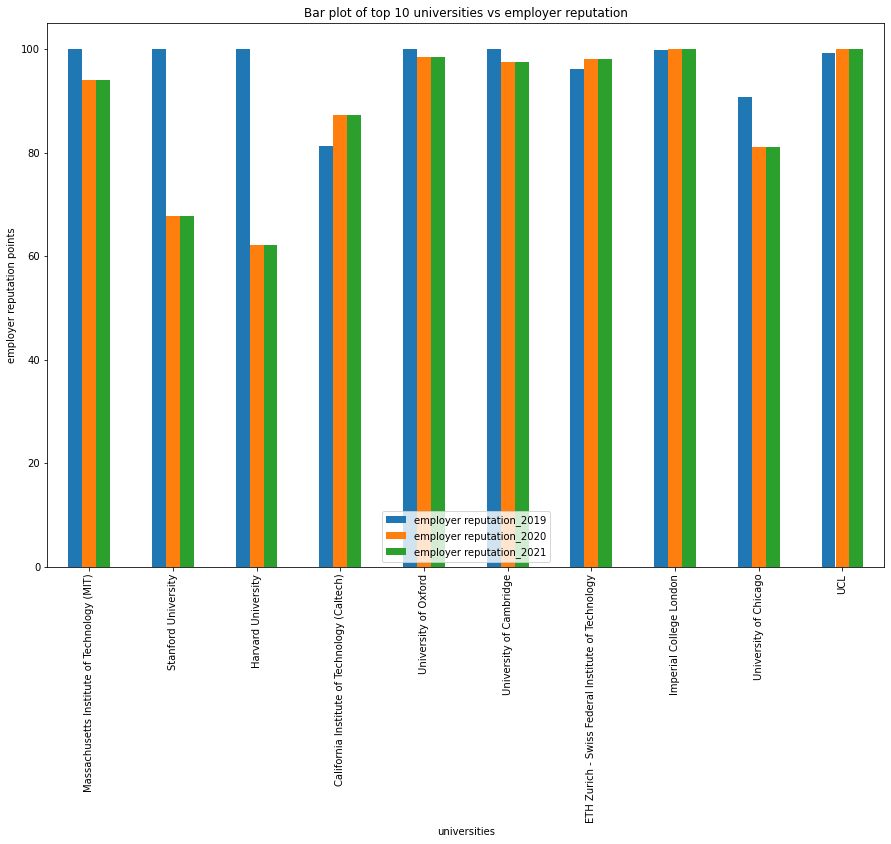

In [786]:
#Add code here

resultant_df.plot.bar(x = 'university', ylabel = 'employer reputaion', figsize = (15, 10))
plt.legend(loc = 8)# changes position of legend
plt.title('Bar plot of top 10 universities vs employer reputation')
plt.xlabel('universities')
plt.ylabel('employer reputation points')
plt.show()

# for the year 2020 and 2021 employer reputation is same for all the universities. In 2019 the employer reputation for the top
# 3 universities it is 100, and for these universities it is 30% decreased for the year 2020 and 2021. For harvard the decrease
# in reputation is maximum among all the top 10 universities. The reputation of imperial college and UCL is constant throughout
# the 3 years. The decrease in employer reputation after 2019 is may be due to Covid-19 as our results are clearly representing 
# it. 

**This question is about Kernel density estimates (KDE). Please refer to your slides if you do not understand this concept properly. <br> <br>
**Q15.** Plot the Kernel density estimate (KDE) of all attributes of score from the USUK2021 dataframe. (5) <br>

**Note 1:** If you think there is any variable that does not need to be plotted, leave a rationale for it in the form of a comment before the graphs code.<br>
**Note 2:** There should be just one figure having all the plots. Make a suitable legend alongside.



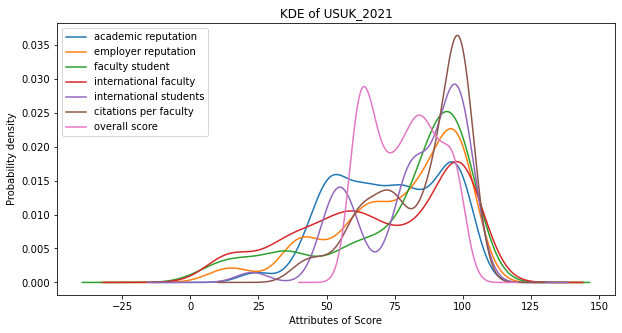

In [787]:
#Add code here
ax = USUK_2021.plot.kde(bw_method=0.3, figsize = (10,5)) # kde drawn with bandwidth value of 0.3 
plt.xlabel('Attributes of Score')
plt.ylabel('Probability density')
plt.title('KDE of USUK_2021')
plt.show()

**You have reached the end of this assignment. Please check whether you have labelled all axes, titles, legends etc. These will carry a good weightage of marks. Have a good day!**

